In [140]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import os 

from numpy import pi
from scripts import dlc_rnn, utils
from scipy.optimize import curve_fit
from scipy import stats

file = '/home/ishan/honors_thesis/models/flyRNN_2l_bs=16.hdf5'
#model = dlc_rnn.LSTM2Dense1(mpath = file, gputouse=1)
np.random.seed(1)

In [16]:
#read in files
Xval = h5py.File('/home/ishan/honors_thesis/validation_set/Xval.h5')['joint_angles']
Yval = h5py.File('/home/ishan/honors_thesis/validation_set/Yval.h5')['joint_angles']
preds = model.model.predict(Xval)
#convert to degrees
Xval = Xval[:]*(180/pi)
Yval = Yval[:]*(180/pi)
preds = preds*(180/pi)

In [17]:
num_timepoints = Xval.shape[0]*Xval.shape[1]
num_angles = Xval.shape[2]
diff = np.reshape((preds-Yval), (num_timepoints,30))
Xdiff= np.reshape((Xval-Yval), (num_timepoints,30))

mse = ((preds-Yval)**2).mean(axis=0).mean(axis=0)

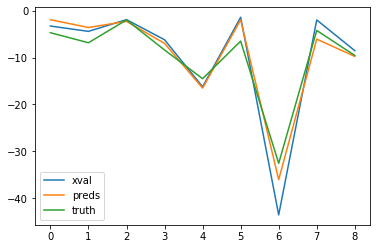

In [18]:
N = slice(1,10)
lag = slice(1)
angle = 20
plt.plot(Xval[N,lag,angle], label='xval')
plt.plot(preds[N,lag,angle], label='preds'), plt.plot(Yval[N,lag,angle], label='truth')
plt.legend()

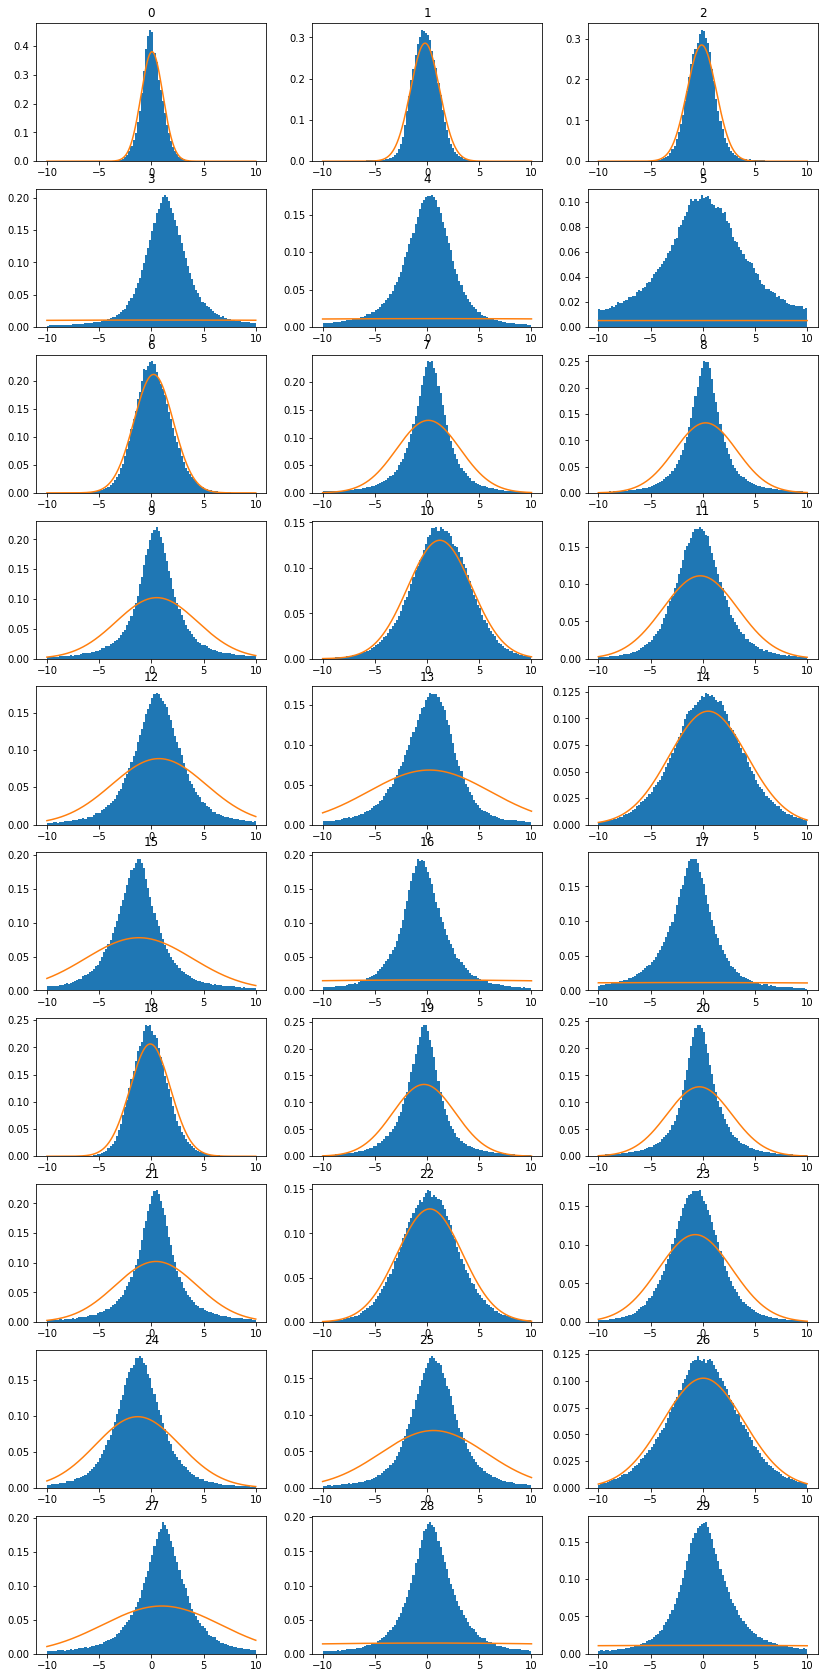

In [5]:
fig, axes = plt.subplots(10,3, figsize=(14,30))
x = np.linspace(-10,10,num_timepoints)
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.set_title(str(ang))
    diff = ((preds-Yval))[:,:,ang].flatten()
    N, bins, patches = ax.hist(diff, bins=100,range=(-10,10), normed=True);
    mean, sig= stats.norm.fit(diff)
    pdf = stats.norm.pdf(x, mean, sig)
    _ = ax.plot(x, pdf)

In [8]:
#fig.savefig('2layer_angleerrors.png')

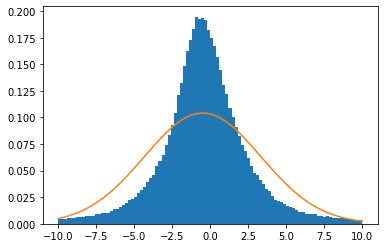

In [223]:
fig, ax = plt.subplots()
diff = ((preds-Yval))[:,:,16].flatten()
N, bins, patches = ax.hist(diff, bins=100,range=(-10,10), normed=True);
mean, sig= stats.norm.fit(np.clip(diff, -10, 10))
pdf = stats.norm.pdf(x, mean, sig)
ax.plot(x, pdf)

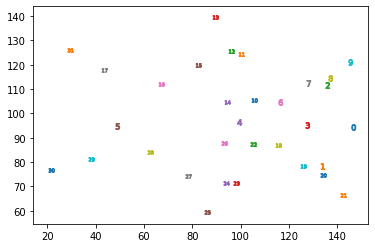

In [136]:
raw_pos = h5py.File('/home/ishan/princeton_data/preds/073012_142509.h5')['positions_pred']
mean_pos = raw_pos[:].mean(axis=0)
for i in range(32):
    plt.scatter(mean_pos[0,i], mean_pos[1,i], marker='$'+ str(i)+ '$')

In [95]:
x_mean = mean_pos[0,:] - mean_pos[0,4]
y_mean = mean_pos[1,:] - mean_pos[1,4]

avg_len= np.sqrt(x_mean**2 + y_mean**2)
avg_len[3] =avg_len[-2]
avg_len[4] =avg_len[-1]
avg_len = avg_len[:-2]
#plt.plot(avg_len, marker='x') --> makes sense.

In [74]:
preds_flat = preds.reshape(num_timepoints,num_angles)
mean_angs = preds_flat.mean(axis=0)

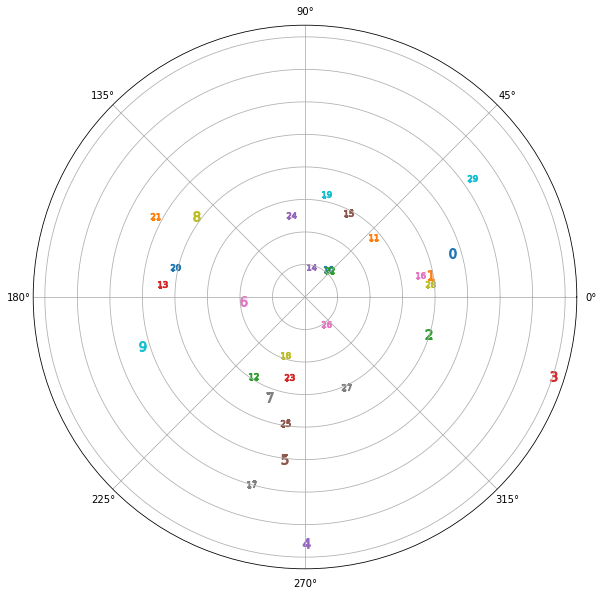

In [148]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
for i in range(num_angles):
    ax.scatter(mean_angs[i], avg_len[i], marker = '$' + str(i) + '$', s = 100)
ax.set_yticklabels([])
ang=8
#ax.scatter(mean_angs[ang],avg_len[ang], marker = '$' + str(ang) + '$', s = 300)

In [149]:
fig.savefig('fly-meanangs.png')

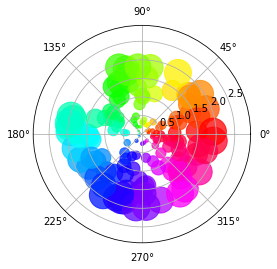

In [100]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)